In [1]:
import numpy as np
import cupy as cp
from numba import jit, prange
import timeit
import matplotlib.pyplot as plt

In [2]:
def matmat_base(a, b):
    c = np.dot(a, b)

def matmat_cp(a, b):
    c = cp.dot(a, b)
    
@jit(nopython=True)
def matmat_nb(a, b):
    c = np.dot(a, b)
    
@jit(nopython=True, parallel=True)
def matmat_nb_parallel(a, b):
    c = np.dot(a, b)

In [3]:
N = [int(8*(2**(0.5))**i) for i in range(18)]
methods = ["base", "cp", "nb", "nb_parallel"]
K = len(methods)
funcs = [matmat_base, matmat_cp, matmat_nb, matmat_nb_parallel]
T = [[] for i in range(K)]
for n in N:
    print("Start with size:", n)
    a = np.random.rand(n, n)
    b = np.random.rand(n, n)
    ca = cp.array(a)
    cb = cp.array(b)
    
    args = [(a,b), (ca,cb), (a,b), (a,b)]
    
    for i in range(K):
        t = %timeit -q -n 1 -r 3 -o funcs[i](*args[i])
        T[i].append(t.average*1000)

Start with size: 8


/home/alm818/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-2-b71babf17c74>", line 12:
@jit(nopython=True, parallel=True)
def matmat_nb_parallel(a, b):
^

  state.func_ir.loc))


Start with size: 11
Start with size: 16
Start with size: 22
Start with size: 32
Start with size: 45
Start with size: 64
Start with size: 90
Start with size: 128
Start with size: 181
Start with size: 256
Start with size: 362
Start with size: 512
Start with size: 724
Start with size: 1024
Start with size: 1448
Start with size: 2048
Start with size: 2896


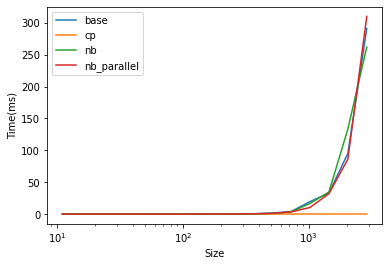

In [4]:
for i in range(K):
    plt.plot(N[1:], T[i][1:], label=methods[i])
plt.xlabel("Size")
plt.ylabel("Time(ms)")
plt.legend()
plt.xscale('log')
plt.show()